# Acceptance angle calibration

This notebook compares the acceptance angle between the measured data and Araki's model

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../')
import os

## Acceptance angle by Araki-san's model

In [3]:
def sensitivity_fun(alignment_err,acceptance_angle,order=2):
    
    first_term=1-0.1*np.power(np.abs(alignment_err),order)/acceptance_angle
    
    return np.maximum(0,first_term)

In [4]:
ae=np.linspace(-2,2,50)
g_func=sensitivity_fun(ae,0.1)

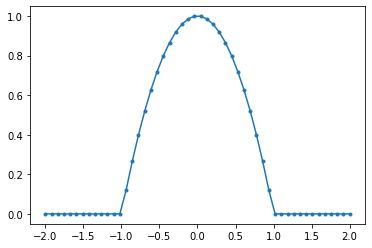

In [5]:
plt.plot(ae,g_func,'.-')

## Dependence of Isc of 33 cm by 33 cm model

Load the acceptance angle data

In [6]:
azuth_angle="panel_angle_dependence_azimuthal.csv"
height_angle="panel_angle_dependence_height.csv"

In [7]:
azimuthal_dep=np.loadtxt(azuth_angle,delimiter=',')
height_dep=np.loadtxt(height_angle,delimiter=',')

In [8]:
ae=np.linspace(-3,3,50)
g_func=sensitivity_fun(ae,0.7,order=3.6)

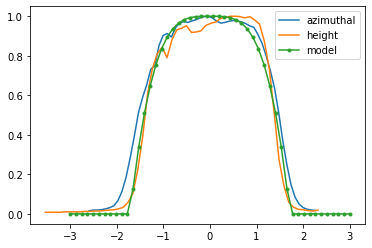

In [9]:
plt.plot(azimuthal_dep[:,0],azimuthal_dep[:,1]/np.max(azimuthal_dep[:,1]),label="azimuthal")
plt.plot(height_dep[:,0],height_dep[:,1]/np.max(height_dep[:,1]),label="height")
plt.plot(ae,g_func,'.-',label="model")
plt.legend()
plt.show()

Acceptance angle=0.7 and order=3.6 is a better fit.

In [10]:
def corrected_isc(isc_0,delta_l0,delta_l1,tracker_offset,acceptance_angle,acceptance_angle_order):
    
    delta_l=np.sqrt(np.power(delta_l0,2)+np.power(delta_l1,2))
    isc=np.sqrt(isc_0*sensitivity_fun(delta_l+tracker_offset,acceptance_angle,acceptance_angle_order))
    return isc

In [11]:
corrected_isc(1,0.01,0.01,0.2,0.7,acceptance_angle_order=3.6)

0.9997217340548575

In [12]:
from pypvcircuit.spice_module_solver import ModuleErr

In [13]:
me=ModuleErr(0.4,-0.6,0.4,100,0.7)

In [14]:
cisc=me.get_isc(0.25)

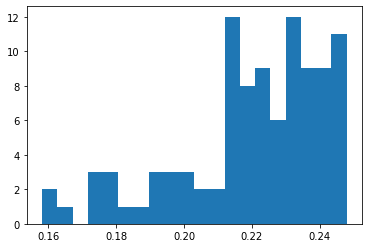

In [15]:
plt.hist(cisc,bins=20)
plt.show()